Êú¨‰π¶ÈÖçÂ•óËßÜÈ¢ëËØæÁ®ãÔºö[Ëß£ÂâñÊ∑±Â∫¶Â≠¶‰π†ÂéüÁêÜÔºå‰ªé0ÂÆûÁé∞Ê∑±Â∫¶Â≠¶‰π†Â∫ì](https://ke.qq.com/course/2900371?tuin=ac5537fd) 

Êõ¥Â§ö‰ª£Á†ÅÊàñÂ≠¶‰π†ËµÑÊñôÂ∞ÜÂêëË¥≠‰π∞ËßÜÈ¢ëËØæÁ®ãÊàñ‰π¶ÁöÑÂ≠¶ÁîüÊèê‰æõ„ÄÇ


+ ÂçöÂÆ¢ÁΩëÁ´ôÔºö[https://hwdong-net.github.io](https://hwdong-net.github.io)
+ youtubeÈ¢ëÈÅì: [hwdong](http://www.youtube.com/c/hwdong)
+ bilibiliÁΩëÁ´ôÔºö[hw-dong](https://space.bilibili.com/281453312)

## 3.6 softmaxÂõûÂΩí

### 3.6.1 spiralÊï∞ÊçÆÈõÜ

‰∏ãÈù¢ÁöÑ‰ª£Á†ÅÁîüÊàê‰∏Ä‰∏™‰∫åÁª¥Âπ≥Èù¢‰∏äÁöÑ3ÂàÜÁ±ªÊï∞ÊçÆÈõÜÔºö

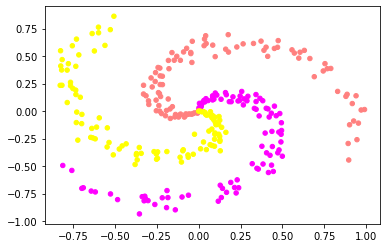

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(100)

def gen_spiral_dataset(N=100,D=2,K=3):
    N = 100 # number of points per class
    D = 2 # dimensionality
    K = 3 # number of classes
    X = np.zeros((N*K,D)) # data matrix (each row = single example)
    y = np.zeros(N*K, dtype='uint8') # class labels
    for j in range(K):
        ix = range(N*j,N*(j+1))
        r = np.linspace(0.0,1,N) # radius
        t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2  # theta
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        y[ix] = j
    return X,y

N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes

X_spiral,y_spiral = gen_spiral_dataset()
# lets visualize the data:
plt.scatter(X_spiral[:, 0], X_spiral[:, 1], c=y_spiral, s=20, cmap=plt.cm.spring) #s=40, cmap=plt.cm.Spectral)
plt.show()

### 3.6.2 softmaxÂáΩÊï∞

In [2]:
import numpy as np

def softmax(x):
    e_x = np.exp(x)
    return e_x / e_x.sum()

In [3]:
z = [3.0, 1.0, 0.2]
softmax(z)

array([0.8360188 , 0.11314284, 0.05083836])

In [4]:
z = [100,1000]
softmax(z)

<ipython-input-2-e3aa77d695fd>:4: RuntimeWarning: overflow encountered in exp
  e_x = np.exp(x)
<ipython-input-2-e3aa77d695fd>:5: RuntimeWarning: invalid value encountered in true_divide
  return e_x / e_x.sum()


array([ 0., nan])

Âõ†Ê≠§ÔºåÂèØ‰ª•ÂÖàÊ±ÇÂá∫ÊâÄÊúâ${z_i}$ÁöÑÊúÄÂ§ßÂÄºaÔºåÁÑ∂ÂêéÁî®${z_i-a}$ÂéªËÆ°ÁÆósoftmax()ÂáΩÊï∞ÂÄº„ÄÇ

In [5]:
def softmax(x):   
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

print(softmax(z))
z = [500,1000]
softmax(z)

[0. 1.]


array([7.12457641e-218, 1.00000000e+000])

In [6]:
z = np.array([[1, 2, 3],[6, 2, 4]])
softmax(z)

array([[0.00548473, 0.01490905, 0.04052699],
       [0.8140064 , 0.01490905, 0.11016379]])

ÂØπÂ§ö‰∏™Ê†∑Êú¨ÔºåÂ∫îËÆ°ÁÆóÂÆÉ‰ª¨ÂêÑËá™ÁöÑsoftmax()ÂáΩÊï∞ÂÄºÔºåÂç≥ÂØπÊØè‰∏™Ê†∑Êú¨ÂçïÁã¨ËÆ°ÁÆóÂÖ∂softmaxÂÄºÂêëÈáè„ÄÇÊ≠£Á°Æ‰ª£Á†ÅÂ∫îËØ•ÊòØ:

In [8]:
def softmax(x):   
    a= np.max(x,axis=-1,keepdims=True)  
    e_x = np.exp(x - a)
    return e_x /np.sum(e_x,axis=-1,keepdims=True)

softmax(z)

array([[0.09003057, 0.24472847, 0.66524096],
       [0.86681333, 0.01587624, 0.11731043]])

In [9]:
def softmax(x):
    e_x=np.exp(x-np.max(x,axis=-1,keepdims=True))
    return e_x /np.sum(e_x,axis=-1,keepdims=True)

softmax(z)

array([[0.09003057, 0.24472847, 0.66524096],
       [0.86681333, 0.01587624, 0.11731043]])

‰∏ÄËà¨ÁöÑÔºåÂÅáËÆæ$\pmb z = (z_1,z_2,\cdots,z_k,\cdots,z_C)$ÔºåÁî®$f(\pmb z)$Ë°®Á§∫$softmax(\pmb z)$ÂáΩÊï∞ÔºåÂàôÊúâÔºö

$$f_i = \frac{e^{z_i}}{\sum_{k=1}^C e^{z_k}}$$

ÂÖ∂‰∏≠Ôºå$\sum_{i=1}^C f_i = 1$„ÄÇ

$\pmb f$ÂÖ≥‰∫é$\pmb z$ÁöÑÊ¢ØÂ∫¶ÂèØÂ¶Ç‰∏ãËÆ°ÁÆóÔºö

In [10]:
def softmax_gradient(z):    
    f = softmax(z)
    grad = -np.outer(f, f) + np.diag(f.flatten())
    return grad

Áî®dfË°®Á§∫Êüê‰∏™ÂÖ∂‰ªñÂèòÈáè$L$ÂÖ≥‰∫é$f$ÁöÑÊ¢ØÂ∫¶ÔºåÂàô$L$ÂÖ≥‰∫é$z$ÁöÑÊ¢ØÂ∫¶ÁöÑpythonËÆ°ÁÆó‰ª£Á†ÅÂ¶Ç‰∏ãÔºö

In [11]:
def softmax_backward(z,df):    
    f = softmax(z)
    grad = -np.outer(f, f) + np.diag(f.flatten())
    
    return df@grad

### 3.6.3 softmaxÂõûÂΩí

$$f(\pmb x) =  softmax (\pmb x\pmb W_{,1},\pmb x\pmb W_{,2},\pmb x\pmb W_{,3}) =  softmax(\pmb x \pmb W) $$

$$L(\pmb W) = -\frac{1}{m} \sum_{i=1}^{m} log({f^{(i)}_{y^{(i)}}}) $$

$$L(\pmb W) = -\frac{1}{m} \sum_{i=1}^{m} log({f^{(i)}_{y^{(i)}}})  = -\frac{1}{m} sum (log \pmb F_{\pmb y}) $$

ËÆ°ÁÆó‰∫§ÂèâÁÜµÁöÑpython‰ª£Á†ÅÂ¶Ç‰∏ãÔºö

In [12]:
def cross_entropy(F,y):
    m = len(F) #y.shape[0]
    log_Fy = -np.log(F[range(m),y])    
    return np.sum(log_Fy) / m  

Áî®Ëøô‰∏™ÂáΩÊï∞ËÆ°ÁÆó‰æãÂ≠ê‰∏≠ÁöÑ‰∫§ÂèâÁÜµÔºö

In [13]:
F = np.array([[0.2,0.5,0.3],[0.2,0.6,0.2]])  #ÊØèË°åÂØπÂ∫î‰∏Ä‰∏™Ê†∑Êú¨
Y = np.array([2,1])

print(-1/2*(np.log(0.3)+np.log(0.6)))
print(cross_entropy(F,Y))

0.8573992140459634
0.8573992140459634


ÂØπ‰∫é‰∏Ä‰∏™Ê†∑Êú¨ÔºåÂ¶ÇÊûúÂÖ∂ÂØπÂ∫îÁöÑ$y^{(i)}$ÁöÑÁ¨¨j‰∏™ÂàÜÈáè$y^{(i)}_j = 1$ÔºåÂç≥ËØ•Ê†∑Êú¨Â±û‰∫éÁ¨¨jÁ±ªÔºåÂàôËØ•Ê†∑Êú¨ÁöÑ‰∫§ÂèâÁÜµÊçüÂ§±ÂèØÂÜôÊàêÔºö

$$-\log(f^{(i)}_j) =-y^{(i)}_j \log(f^{(i)}_j) = - \sum_{j=1}^C y^{(i)}_j \log(f^{(i)}_j) = -y^{(i)} \cdot log(f^{(i)}) $$

ÈíàÂØπone-hotÂΩ¢ÂºèË°®Á§∫ÁöÑÁõÆÊ†áÂÄºÔºåÂèØ‰ª•Â∞ÜÊâÄÊúâÊ†∑Êú¨ÁöÑ‰∫§ÂèâÁÜµÊçüÂ§±ÂÜôÊàêÂ¶Ç‰∏ãÂΩ¢ÂºèÔºö

$$\begin{aligned}L(\pmb W) &= -\frac{1}{m} \sum_{i=1}^m y^{(i)}\cdot log(f^{(i)})= -\frac{1}{m} np.sum(Y \odot log(F) )\end{aligned}$$

ÂØπÂ∫îÁöÑpythonËÆ°ÁÆó‰ª£Á†ÅÂ¶Ç‰∏ãÔºö

In [15]:
def cross_entropy_one_hot(F,Y):
    m = len(F) 
    return -np.sum(Y*np.log(F))/m  # -(1./m) *np.sum(np.multiply(y, np.log(f)))

F = np.array([[0.2,0.5,0.3],[0.2,0.6,0.2]])  #ÊØèË°åÂØπÂ∫î‰∏Ä‰∏™Ê†∑Êú¨
Y = np.array([[0,0,1],[0,1,0]])

print(cross_entropy_one_hot(F,Y))

0.8573992140459634


### 3.6.5 ÈÄöËøáÂä†ÊùÉÂíåËÆ°ÁÆó‰∫§ÂèâÁÜµÊçüÂ§±

In [16]:
def softmax(Z):
    A = np.exp(Z-np.max(Z,axis=1,keepdims=True))
    return A/np.sum(A,axis=1,keepdims=True)

def softmax_cross_entropy(Z,y):
    m = len(Z)
    F = softmax(Z)
    log_Fy = -np.log(F[range(m),y])
    return  np.sum(log_Fy) / m

In [17]:
Z = np.array([[2,25,13],[54,3,11]])  #ÊØèË°åÂØπÂ∫î‰∏Ä‰∏™Ê†∑Êú¨
y = np.array([2,1])
softmax_cross_entropy(Z,y)

31.500003072148047

Â¶ÇÊûúÁõÆÊ†áÊ†áÁ≠æÊòØone-hotÂêëÈáèÂΩ¢ÂºèÔºåÂàô‰∏ãÈù¢‰ª£Á†Å‰ªéÂä†ÊùÉÂíåËÆ°ÁÆó‰∫§ÂèâÁÜµÊçüÂ§±Ôºö

In [18]:
def softmax_cross_entropy_one_hot(Z, y):    
    F = softmax(Z)
    loss =  -np.sum(y*np.log(F),axis=1)
    return np.mean(loss)  

In [19]:
Z = np.array([[2,25,13],[54,3,11]])  #ÊØèË°åÂØπÂ∫î‰∏Ä‰∏™Ê†∑Êú¨
y = np.array([[0, 0, 1],[0, 1, 0]])
softmax_cross_entropy_one_hot(Z,y)

31.500003072148047

### 3.6.6 softmaxÂõûÂΩíÁöÑÊ¢ØÂ∫¶ËÆ°ÁÆó

$$\nabla_Z{\mathcal L} = \pmb F -\pmb I_i$$

ÊàñËÄÖ

$$\nabla_Z{\mathcal L} = \pmb F -\pmb Y$$

In [21]:
def grad_softmax_crossentropy(Z,y):
    F = softmax(Z)
    I_i = np.zeros_like(Z)
    I_i[np.arange(len(Z)),y] = 1   
    return (F - I_i) / Z.shape[0]

In [22]:
def grad_softmax_cross_entropy(Z,y):
    m = len(Z)
    F = softmax(Z) 
    F[range(m),y] -= 1
    return F/m  

In [23]:
Z = np.array([[2,25,13],[54,3,11]])  #ÊØèË°åÂØπÂ∫î‰∏Ä‰∏™Ê†∑Êú¨
y = np.array([2,1])
grad_softmax_cross_entropy(Z,y)
#grad_softmax_crossentropy(Z,y)

array([[ 5.13090829e-11,  4.99996928e-01, -4.99996928e-01],
       [ 5.00000000e-01, -5.00000000e-01,  1.05756552e-19]])

‰∏∫‰∫ÜÁ°Æ‰øùÂàÜÊûêÊ¢ØÂ∫¶ËÆ°ÁÆóÊ≤°ÊúâÈîôËØØÔºåÂèØ‰ª•Áî®1.4)ËäÇÁöÑÈÄöÁî®Êï∞ÂÄºÊ¢ØÂ∫¶ÂáΩÊï∞ËÆ°ÁÆó‰∫§ÂèâÁÜµÂÖ≥‰∫éZÁöÑÊï∞ÂÄºÊ¢ØÂ∫¶Âíå‰∏äËø∞ÁöÑÂàÜÊûêÊ¢ØÂ∫¶ËøõË°åÊØîËæÉÔºö

In [26]:
def loss_f():
    return softmax_cross_entropy(Z,y)

import util
Z = Z.astype(float)        #Ê≥®ÊÑèÔºöÂøÖÈ°ªÂ∞ÜÊï¥Êï∞Êï∞ÁªÑËΩ¨ÂåñÊàêfloatÁ±ªÂûã
print("num_grad",util.numerical_gradient(loss_f,[Z]))

num_grad [array([[ 0.        ,  0.49999693, -0.49999693],
       [ 0.5       , -0.5       ,  0.        ]])]


Â¶ÇÊûúÊ†∑Êú¨ÁõÆÊ†áÊòØ‰ΩøÁî®one-hotÂêëÈáèË°®Á§∫ÁöÑÔºåÂàôËÆ°ÁÆó‰∫§ÂèâÁÜµÂÖ≥‰∫éZÁöÑÊ¢ØÂ∫¶‰ª£Á†ÅÂ¶Ç‰∏ãÔºö

In [27]:
def grad_softmax_crossentropy_one_hot(Z, y):   #yÊòØÁî®one-hotÂêëÈáèË°®Á§∫ÁöÑ
    F = softmax(Z) 
    return (F - y)/Z.shape[0]

Z = np.array([[2,25,13],[54,3,11]])  #ÊØèË°åÂØπÂ∫î‰∏Ä‰∏™Ê†∑Êú¨
y = np.array([[0, 0, 1],[0, 1, 0]])
grad_softmax_crossentropy_one_hot(Z,y)

array([[ 5.13090829e-11,  4.99996928e-01, -4.99996928e-01],
       [ 5.00000000e-01, -5.00000000e-01,  1.05756552e-19]])

ÂàôÊçüÂ§±ÂáΩÊï∞ÂÖ≥‰∫éÊùÉÈáç$\pmb W$ÁöÑÊ¢ØÂ∫¶ÁöÑÂêëÈáèÂΩ¢ÂºèÊòØÔºö

$$ \frac {\partial{\mathcal L}} {\partial{\pmb W } } = {\pmb X}^T {(\pmb F-\pmb Y)} \tag{3-61}$$

ÂêåÊ†∑ÔºåÂèØ‰ª•ÁªôsoftmaxÂõûÂΩíÁöÑ‰∫§ÂèâÁÜµÊçüÂ§±Ê∑ªÂä†Ê≠£ÂàôÈ°πÔºåÂ¶ÇÊûúÁî®Êï¥Êï∞Ë°®Á§∫ÁõÆÊ†áÂÄºÔºåÂç≥ÊçüÂ§±ÂáΩÊï∞Âèò‰∏∫Ôºö

$$L(\pmb W) = -\frac{1}{m} \sum_{i=1}^{m} log({f^{(i)}_{y^{(i)}}}) +\lambda \|\pmb W\|^2  \tag{3-62}$$

Â¶ÇÊûúÁî®one-hotÂêëÈáèË°®Á§∫ÁõÆÊ†áÂÄºÔºåÂàôÂç≥ÊçüÂ§±ÂáΩÊï∞Âèò‰∏∫Ôºö

$$L(\pmb W) =-\frac{1}{m} \sum_{i=1}^m y^{(i)}\dot log(f^{(i)}) +\lambda \|W\|^2  \tag{3-63} $$


ÂàôÊçüÂ§±ÂáΩÊï∞ÂÖ≥‰∫éÊùÉÈáç$\pmb W$ÁöÑÊ¢ØÂ∫¶ÊòØÔºö

$$ \frac {\partial{\mathcal L}} {\partial{\pmb W } } = {\pmb X}^T {(\pmb F-\pmb Y)} +2 \lambda \pmb W  \tag{3-64}$$

Ê†πÊçÆÊ¢ØÂ∫¶ÁöÑËÆ°ÁÆóÂÖ¨ÂºèÔºåÂèØ‰ª•ÂæàÂÆπÊòìÂÜôÂá∫ÊçüÂ§±ÂáΩÊï∞ÂÖ≥‰∫é$\pmb W$ÁöÑÊ¢ØÂ∫¶ÁöÑËÆ°ÁÆó‰ª£Á†Å„ÄÇ‰∏ãÂàó‰ª£Á†Å‰∏≠ÔºåÂÅáËÆæXË°®Á§∫Â§ö‰∏™Ê†∑Êú¨ÁöÑÊï∞ÊçÆÁâπÂæÅÁü©ÈòµÔºåyË°®Á§∫ÁõÆÊ†áÂÄºÂêëÈáèÔºåregÊòØÊ≠£ÂàôÂåñÂèÇÊï∞$\lambda$Ôºåloss_softmax()Âíågradient_softmax()ÂàÜÂà´ËÆ°ÁÆóÊçüÂ§±ÂáΩÊï∞ÁöÑÊçüÂ§±ÂíåÂÖ≥‰∫é$\pmb W$ÁöÑÊ¢ØÂ∫¶Ôºö

In [28]:
def gradient_softmax(W,X,y,reg):
    m = len(X)
    Z=  np.dot(X,W)
    
    I_i = np.zeros_like(Z)
    I_i[np.arange(len(Z)),y] = 1
    F = softmax(Z)
    #F = np.exp(Z) / np.exp(Z).sum(axis=-1,keepdims=True)
    grad =  (1 / m) * np.dot(X.T,F - I_i)      # Z.shape[0]
    grad = grad +2*reg*W
    return grad

def loss_softmax(W,X,y,reg):
    m = len(X)
    Z=  np.dot(X,W)   
    loss =  softmax_cross_entropy(Z,y)+reg*np.sum(W*W)
    return loss  


def loss_softmax_(W,X,y,reg):
    m = len(X)
    Z=  np.dot(X,W) 
    Z_i_y_i = Z[np.arange(len(Z)),y]
    negtive_log_prob = - Z_i_y_i + np.log(np.sum(np.exp(Z),axis=-1))
    loss =  np.mean(negtive_log_prob)+reg*np.sum(W*W)
    return loss  

Áî®‰∏ãÂàóÊï∞ÊçÆÊµãËØï‰∏Ä‰∏ãËøô‰∏™ÂáΩÊï∞Ôºö

In [29]:
X = np.array([[2,3],[4,5]])  #ÊØèË°åÂØπÂ∫î‰∏Ä‰∏™Ê†∑Êú¨,ÊØè‰∏™Ê†∑Êú¨ÊòØ2‰∏™ÁâπÂæÅ
y = np.array([2,1])             #Á±ªÂà´Êï∞ÊòØ3
W = np.array([[0.1,0.2,0.3],[0.4,0.2,0.8]])  #  2X3Áü©Èòµ

reg = 0.2;

print(gradient_softmax(W,X,y,reg))
print(loss_softmax(W,X,y,reg))
print(loss_softmax_(W,X,y,reg))

[[ 0.30213245 -1.75779321  1.69566076]
 [ 0.5254108  -2.19194012  2.22652932]]
2.0863049636282662
2.0863049636282662


Â¶ÇÊûúÁî®one-hotÂêëÈáèË°®Á§∫ÊØè‰∏™Ê†∑Êú¨ÁöÑÁõÆÊ†áÂÄºÔºåyË°®Á§∫Â§ö‰∏™Ê†∑Êú¨ÁöÑÁõÆÊ†áÂÄºÊûÑÊàêÁöÑÁü©ÈòµÔºåÂàô‰∏ãÈù¢ÁöÑloss_softmax_onthot()Âíågradient_softmax_onthot()ÂàÜÂà´ËÆ°ÁÆóÊçüÂ§±ÂáΩÊï∞ÁöÑÊçüÂ§±ÂíåÂÖ≥‰∫é$\pmb W$ÁöÑÊ¢ØÂ∫¶Ôºö

In [30]:
def gradient_softmax_onehot(W,X,y,reg):
    m = len(X)   #Ê†∑Êú¨Êï∞ÁõÆ
    nC = W.shape[1]   #Á±ªÂà´Êï∞ÁõÆ
    #y_one_hot = np.eye(nC)[y[:,0]]
    y_one_hot = y
    
    Z = np.dot(X,W)      # ZÊòØÂä†ÊùÉÂíå
    F = softmax(Z)       # FÊòØÊ¶ÇÁéáÁü©Èòµ
    grad = (1 / m) * np.dot(X.T,(F - y_one_hot)) + 2*reg*W 
    return grad

def loss_softmax_onehot(W,X,y,reg):
    m = len(X)  #First we get the number of training examples
    nC = W.shape[1]
    #y_one_hot = np.eye(nC)[y[:,0]]
    y_one_hot = y
    
   # y_mat = oneHotIt(y)  #Â∞ÜÊï¥Êï∞Á±ªÁºñÁ†ÅËΩ¨Êç¢‰∏∫one-hotÂêëÈáèÂΩ¢Âºè
    Z = np.dot(X,W)       # ZÊòØÂä†ÊùÉÂíå
    F = softmax(Z)        # FÊòØÊ¶ÇÁéáÁü©Èòµ
    loss = (-1 / m) * np.sum(y_one_hot * np.log(F)) + (reg)*np.sum(W*W) 
    return loss

In [31]:
X = np.array([[2,3],[4,5]])  #ÊØèË°åÂØπÂ∫î‰∏Ä‰∏™Ê†∑Êú¨,ÊØè‰∏™Ê†∑Êú¨ÊòØ2‰∏™ÁâπÂæÅ
y = np.array([[0,0,1],[0,1,0]])             #Á±ªÂà´Êï∞ÊòØ3
W = np.array([[0.1,0.2,0.3],[0.4,0.2,0.8]])  #  2X3Áü©Èòµ

reg = 0.2;
print(gradient_softmax_onehot(W,X,y,reg))
print(loss_softmax_onehot(W,X,y,reg))

[[ 0.30213245 -1.75779321  1.69566076]
 [ 0.5254108  -2.19194012  2.22652932]]
2.0863049636282662


### 3.6.7 softmaxÂõûÂΩíÁöÑÊ¢ØÂ∫¶‰∏ãÈôçÊ≥ïÁöÑÂÆûÁé∞

Âú®Ê≠§Âü∫Á°Ä‰∏äÁöÑÊ¢ØÂ∫¶‰∏ãÈôçÁÆóÊ≥ï‰ª£Á†ÅÂ¶Ç‰∏ãÔºö

In [32]:
def gradient_descent_softmax(w,X, y, reg=0., alpha=0.01, iterations=100,gamma = 0.8,epsilon=1e-8):
    X = np.hstack((np.ones((X.shape[0], 1), dtype=X.dtype),X))  #Ê∑ªÂä†‰∏ÄÂàóÁâπÂæÅ1  
    v= np.zeros_like(w)
    #losses = []
    w_history=[] 
    for i in range(0,iterations):
        gradient = gradient_softmax(w,X,y,reg)
        if np.max(np.abs(gradient))<epsilon:
            print("gradient is small enough!")
            print("iterated num is :",i)
            break            
        
        w = w - (alpha * gradient)
        #v = gamma*v+alpha* gradientz
        #w= w-v
        #losses.append(loss)
        w_history.append(w)
    return w_history

ÂØπ‰∏ÄÁªÑÊ†∑Êú¨(X,y)Ôºå‰∏ãÈù¢ÁöÑËæÖÂä©ÂáΩÊï∞ËÆ°ÁÆóÂéÜÂè≤ËÆ∞ÂΩïw_historyÈáåÁöÑÊØè‰∏™Ê®°ÂûãÂèÇÊï∞ÂØπÂ∫îÁöÑÊ®°ÂûãÊçüÂ§±Ôºö

In [33]:
def compute_loss_history(w_history,X,y,reg=0.,OneHot=False):
    loss_history=[]
    X = np.hstack((np.ones((X.shape[0], 1), dtype=X.dtype),X))
    if OneHot:
        for w in w_history:
            loss_history.append(loss_softmax_onthot(w,X,y,reg))
    else: 
        for w in w_history:
            loss_history.append(loss_softmax(w,X,y,reg))
    return loss_history

### 2.6.8  spiralÊï∞ÊçÆÈõÜÁöÑsoftmaxÂõûÂΩí

w:  [[-0.05920585  0.00607797  0.05312788]
 [ 1.1810134   1.02222379 -2.20323719]
 [-2.39215667  2.77296386 -0.3808072 ]]
[1.0681234262911812, 0.8321410771358214, 0.788734093154218, 0.7757732070848885, 0.7709659484297107, 0.7689671616291273, 0.7680780120185511, 0.76766521456332, 0.7674681036477377, 0.7673721797769464]


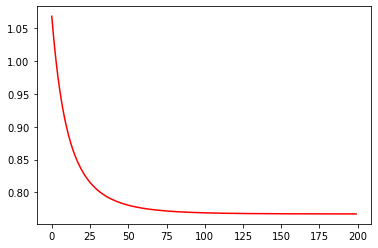

In [34]:
X_spiral,y_spiral = gen_spiral_dataset()
X = X_spiral
y = y_spiral

alpha = 1e-0
iterations  =200
reg = 1e-3

w = np.zeros([X.shape[1]+1,len(np.unique(y))])
w_history = gradient_descent_softmax(w,X,y,reg,alpha,iterations)
w = w_history[-1]
print("w: ",w)
loss_history = compute_loss_history(w_history,X,y,reg)
print(loss_history[:-1:len(loss_history)//10])
plt.plot(loss_history, color='r')

‰∏ãÈù¢ÂáΩÊï∞ÂèØ‰ª•ËÆ°ÁÆóËÆ≠ÁªÉÊ®°ÂûãÂú®‰∏ÄÊâπÊï∞ÊçÆ(X,y)‰∏äÁöÑÈ¢ÑÊµãÂáÜÁ°ÆÊÄßÔºö

In [35]:
def getAccuracy(w,X,y):
    X = np.hstack((np.ones((X.shape[0], 1), dtype=X.dtype),X))  #Ê∑ªÂä†‰∏ÄÂàóÁâπÂæÅ1 
    probs = softmax(np.dot(X,w))
    predicts = np.argmax(probs,axis=1) 
    accuracy = sum(predicts == y)/(float(len(y)))
    return accuracy

ÂØπÂàöÊâçÁöÑÊï∞ÊçÆÈõÜÁî®getAccuracy()ËÆ°ÁÆóËÆ≠ÁªÉÂæóÂà∞ÁöÑsoftmaxÊ®°ÂûãÁöÑÈ¢ÑÊµãÂáÜÁ°ÆÂ∫¶„ÄÇ

In [36]:
getAccuracy(w,X_spiral,y_spiral)

0.5133333333333333

‰∏ãÈù¢‰ª£Á†ÅÁªòÂà∂Âá∫ÂØπ‰∫éËøô‰∏™ÈóÆÈ¢òÁöÑsoftmaxÊ®°ÂûãÁöÑÂàÜÁ±ªËæπÁïåÔºö

(-1.9181692991988153, 1.901830700801188)

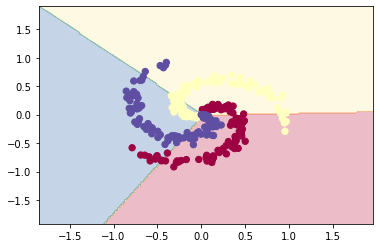

In [37]:
# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = np.dot(np.c_[np.ones(xx.size),xx.ravel(), yy.ravel()], w) 
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
#fig.savefig('spiral_linear.png')

ÂèØËßÅsoftmaxÂõûÂΩíÊú¨Ë¥®‰∏ä‰ªçÁÑ∂ÊòØÁ∫øÊÄßÂáΩÊï∞Ê®°ÂûãÔºåË°®Áé∞Âú®ÂõæÂΩ¢‰∏äÂÖ∂ÂàÜÂâ≤Á∫øÈÉΩÊòØ‰∏Ä‰∫õÁõ¥Á∫øÔºåÂæàÈöæÂØπÊï∞ÊçÆËøõË°åÈùûÁ∫øÊÄßÂàÜÂâ≤ÔºåÊ®°ÂûãÁöÑÂáÜÁ°ÆÂ∫¶ÊòØ 0.5366666666666666 „ÄÇ

## 3.7 ÊâπÊ¢ØÂ∫¶‰∏ãÈôçÊ≥ïÂíåÈöèÊú∫Ê¢ØÂ∫¶‰∏ãÈôçÊ≥ï

‰∏ãÈù¢‰ª£Á†ÅËØªÂèñMNISTÊâãÂÜôÊï∞Â≠óËÆ≠ÁªÉÈõÜÔºö

In [39]:
import pickle, gzip, urllib.request, json
import numpy as np
import os.path

if not os.path.isfile("mnist.pkl.gz"):
    # Load the dataset
    urllib.request.urlretrieve("http://deeplearning.net/data/mnist/mnist.pkl.gz", "mnist.pkl.gz")
    
with gzip.open('mnist.pkl.gz', 'rb') as f:
    train_set, valid_set, test_set = pickle.load(f, encoding='latin1')

train_X, train_y = train_set
valid_X, valid_y = valid_set
test_X, test_y = valid_set
print(train_X.shape,train_y.shape)
print(valid_X.shape,valid_y.shape)
print(test_X.shape,test_y.shape)
print(train_X.dtype,train_y.dtype)
print(train_X[9][300],train_y[9])
print(np.min(train_y),np.max(train_y))

(50000, 784) (50000,)
(10000, 784) (10000,)
(10000, 784) (10000,)
float32 int64
0.98828125 4
0 9


ÂèØËßÜÂåñÂÖ∂‰∏≠ÁöÑ‰∏ÄÂπÖÂõæÂÉèÔºö

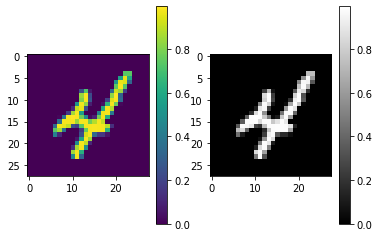

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
digit = train_X[9].reshape(28,28)
plt.subplot(1,2,1)
plt.imshow(digit)
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(digit,cmap='gray')
plt.colorbar()
plt.show()

ÁªßÁª≠ËæìÂá∫ËØ•Ê†∑Êú¨‰∏≠ÁöÑÂ∞ëÊï∞ÂÉèÁ¥†ÂÄºÔºàÊï∞ÊçÆÁâπÂæÅÔºâ„ÄÇ

In [41]:
print(train_X.shape)
print(train_X[9][200:250])

(50000, 784)
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.75       0.984375
 0.73046875 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.2421875  0.72265625 0.0703125  0.         0.         0.
 0.         0.34765625 0.921875   0.84765625 0.18359375 0.
 0.         0.        ]


In [42]:
len(np.unique(train_y))

10

### 3.7.2 Áî®ÈÉ®ÂàÜËÆ≠ÁªÉÊ†∑Êú¨ËÆ≠ÁªÉÈÄªËæëÂõûÂΩí

ËÆ≠ÁªÉÈõÜÁöÑÊ†∑Êú¨Êï∞ÁõÆËææÂà∞50000‰∏™ÔºåÁî®Êï¥‰∏™ËÆ≠ÁªÉÈõÜÁöÑÊ†∑Êú¨ËøõË°åËÆ≠ÁªÉÔºåÊØèÊ¨°ËÆ°ÁÆóÈÉΩÈúÄË¶ÅÊ∂àËÄóÂæàÂ§öËµÑÊ∫êÂíåÊó∂Èó¥Ôºå‰∏∫‰∫ÜÊèêÈ´òËÆ≠ÁªÉÊïàÁéáÔºåÂèØ‰ª•‰ªé‰∏≠ÂèñÂá∫ÈÉ®ÂàÜÊï∞ÊçÆÔºåÂ¶ÇÁî®batch=500‰∏™Ê†∑Êú¨ËøõË°åËÆ≠ÁªÉÔºö

In [43]:
batch = 500

alpha  =1e-2
iterations  =1000
reg = 1e-3

w_history=[]

w = np.zeros([train_X.shape[1]+1,len(np.unique(train_y))])
for i in range(5):
    s = i*batch
    X = train_X[s :s+batch,:]
    y = train_y[s :s+batch]
    w_history_batch = gradient_descent_softmax(w,X,y,reg,alpha,iterations)
    w = w_history_batch[-1]
    w_history.extend(w_history_batch)
    
print("w: ",w)
loss_history = compute_loss_history(w_history,X,y,reg)
print(loss_history[:-1:len(loss_history)//10])

w:  [[-0.1081236   0.15722483 -0.03458512 ...  0.14556747 -0.28445635
  -0.0646967 ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]
[2.291196965908743, 0.8358952420130783, 0.6737094231518491, 0.5552073298551986, 0.5205304526858188, 0.47774180354644386, 0.4642950154766653, 0.45662996516999915, 0.45159800707999115, 0.3368287901629059]


ÂàÜÂà´ËÆ°ÁÆóÊ®°ÂûãÂáΩÊï∞Âú®ËÆ≠ÁªÉÈõÜ„ÄÅÈ™åËØÅÈõÜ„ÄÅÊµãËØïÈõÜ‰∏äÁöÑÂáÜÁ°ÆÊÄßÔºö

In [44]:
print("ËÆ≠ÁªÉÈõÜÁöÑÂáÜÁ°ÆÊÄßÔºö",getAccuracy(w,train_X,train_y))
print("È™åËØÅÈõÜÁöÑÂáÜÁ°ÆÊÄßÔºö",getAccuracy(w,valid_X,valid_y))
print("ÊµãËØïÈõÜÁöÑÂáÜÁ°ÆÊÄßÔºö",getAccuracy(w,test_X,test_y))

ËÆ≠ÁªÉÈõÜÁöÑÂáÜÁ°ÆÊÄßÔºö 0.86746
È™åËØÅÈõÜÁöÑÂáÜÁ°ÆÊÄßÔºö 0.8837
ÊµãËØïÈõÜÁöÑÂáÜÁ°ÆÊÄßÔºö 0.8837


ÁªòÂà∂ËÆ≠ÁªÉÈõÜÂíåÈ™åËØÅÈõÜÁöÑËø≠‰ª£ÊçüÂ§±Â≠¶‰π†Êõ≤Á∫øÔºö

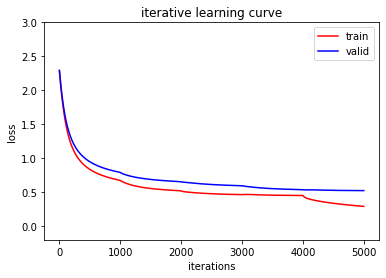

In [45]:
loss_history_valid = compute_loss_history(w_history,valid_X[0:1000,:],valid_y[0:1000],reg)

plt.plot(loss_history, color='r')
plt.plot(loss_history_valid, color='b') 
plt.ylim(0,5)
plt.xlabel('iterations')
plt.ylabel('loss')
plt.title('iterative learning curve')
plt.legend(['train', 'valid'])
plt.ylim(-0.2,3)
plt.show()      

### 3.7.3 ÊâπÊ¢ØÂ∫¶‰∏ãÈôçÊ≥ïÂèäÂÆûÁé∞

ÊâπÊ¢ØÂ∫¶‰∏ãÈôçÊ≥ïÁöÑ‰∏ÄËà¨ÂÅöÊ≥ïÊòØÔºö
+ 1) ÂØπÂéüËÆ≠ÁªÉÈõÜ‰∏≠ÁöÑÊ†∑Êú¨Ê¨°Â∫èÈáçÊñ∞ÊéíÂàóÔºåÂç≥Êâì‰π±ÂéüËÆ≠ÁªÉÈõÜ‰∏≠Ê†∑Êú¨ÁöÑÊ¨°Â∫è„ÄÇ
+ 2) ÂØπÈáçÊéíÂêéÁöÑËÆ≠ÁªÉÈõÜÔºå‰ªéÂ§¥ÂºÄÂßãÔºå‰æùÊ¨°ÂèñÂá∫‰∏ÄÂ∞èÊâπÊ†∑Êú¨ÔºåÁî®Ëøô‰∏ÄÊâπÊ†∑Êú¨ËÆ°ÁÆóÊ®°ÂûãÂáΩÊï∞ÊçüÂ§±ÁöÑÊ¢ØÂ∫¶ÔºåÂπ∂Êõ¥Êñ∞Ê®°ÂûãÂèÇÊï∞„ÄÇ
+ 3) Â§öÊ¨°ÈáçÂ§ç 1),2)„ÄÇ
‰∏äËø∞‰∏≠ÁöÑ1),2)ÂÆåÊàê‰∫ÜÂØπËÆ≠ÁªÉÈõÜ‰∏≠Âá†‰πéÊâÄÊúâÊ†∑Êú¨ÁöÑ‰∏ÄË∂üÈÅçÂéÜÔºåÂú®Ëøô‰∏ÄË∂üÈÅçÂéÜ‰∏≠Áî®‰∏çÂêåÁöÑ‰∏ÄÂ∞èÊâπÊ†∑Êú¨ÂØπÊ®°ÂûãÂèÇÊï∞ËøõË°å‰∫ÜÊõ¥Êñ∞„ÄÇÂõ†Ê≠§ÔºåËøô‰∏™1),2)ÁöÑËøáÁ®ãÁß∞‰∏∫‰∏Ä‰∏™epoch„ÄÇ3)Ë°®Á§∫ÊâßË°åÂ§öÊ¨°ÁöÑepoch„ÄÇ

Êâì‰π±‰∏Ä‰∏™ÂàóË°®ÁöÑÊ¨°Â∫èÂèØÁî®numpy.random.shuffle()ÂáΩÊï∞Ôºå‰æãÂ¶ÇÔºö

In [46]:
m=5
indices = list(range(m))
print(indices)
np.random.shuffle(indices)
print(indices)

[0, 1, 2, 3, 4]
[2, 1, 0, 3, 4]


ÂØπÂ∫î‰∏Ä‰∏™Êï∞ÊçÆÈõÜ(X,y)ÔºåÂèØÂÆö‰πâ‰∏Ä‰∏™Ëø≠‰ª£Âô®ÂáΩÊï∞data_iter()ÔºåÁî®‰∫éÊâì‰π±ÂéüÊï∞ÊçÆÈõÜÁöÑÊ¨°Â∫èÔºåÂπ∂ÊØèÊ¨°‰ªéÊï∞ÊçÆÈõÜ‰∏≠ËøîÂõûbatchsizeÂ§ßÂ∞èÁöÑ‰∏ÄÂ∞èÊâπËÆ≠ÁªÉÊ†∑Êú¨Ôºö

In [47]:
def data_iter(X,y,batch_size,shuffle=False):
    m = len(X)  
    indices = list(range(m))
    if shuffle:                 # shuffleÊòØTrueË°®Á§∫Êâì‰π±Ê¨°Â∫è
        np.random.shuffle(indices)
    for i in range(0, m - batch_size + 1, batch_size):
        batch_indices = np.array(indices[i: min(i + batch_size, m)])      
        yield X.take(batch_indices,axis=0), y.take(batch_indices,axis=0)   

ÊâπÊ¢ØÂ∫¶‰∏ãÈôçÊ≥ïÁöÑ‰ª£Á†ÅÂÆûÁé∞Ôºö

In [48]:
def batch_gradient_descent_softmax(w,X, y, epochs,batchsize = 50,shuffle = False,
                                   reg=0., alpha=0.01, gamma = 0.8,epsilon=1e-8): 
    w_history = []
    X = np.hstack((np.ones((X.shape[0], 1), dtype=X.dtype),X)) 
    for epoch in range(epochs):
        for X_batch,y_batch in data_iter(X,y,batchsize,shuffle):
            gradient = gradient_softmax(w,X_batch,y_batch,reg)
            if np.max(np.abs(gradient))<epsilon:
                print("gradient is small enough!")
                print("iterated num is :",i)
                break          
            w = w - (alpha * gradient)
            w_history.append(w)
    return w_history

ÂØπMnistÊâãÂÜôÊï∞Â≠óËØÜÂà´ËÆ≠ÁªÉÈõÜÔºåÊâßË°åËøô‰∏™ÊâπÊ¢ØÂ∫¶‰∏ãÈôçÊ≥ïÔºö

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline

batchsize = 50
epochs = 5
shuffle = True
alpha = 0.01
reg = 1e-3
gamma = 0.8

X,y = train_X,train_y
w = np.zeros([X.shape[1]+1,len(np.unique(y))])   
w_history = batch_gradient_descent_softmax(w,train_X,train_y,epochs,batchsize,
                                                shuffle,reg,alpha,gamma)
w = w_history[-1]
print("w: ",w)
X,y = train_X[0:1000,:],train_y[0:1000]
loss_history = compute_loss_history(w_history,X,y,reg)
print(loss_history[:-1:len(loss_history)//10])

w:  [[-0.09799915  0.19013309 -0.03203123 ...  0.14410694 -0.35215659
  -0.05804954]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]
[2.293262307414389, 0.825868886995949, 0.643869466832342, 0.570418897469662, 0.5338953881876869, 0.5070184011149137, 0.4900678967579153, 0.47706039807365735, 0.46572411077892795, 0.4613240435830291]


‰∏ãÈù¢ËæìÂá∫Ê®°ÂûãÂú®‰∏çÂêåÊ†∑Êú¨ÈõÜ‰∏äÁöÑÂáÜÁ°ÆÂ∫¶„ÄÇ

In [50]:
print("ËÆ≠ÁªÉÈõÜÁöÑÂáÜÁ°ÆÊÄßÔºö",getAccuracy(w,train_X,train_y))
print("È™åËØÅÈõÜÁöÑÂáÜÁ°ÆÊÄßÔºö",getAccuracy(w,valid_X,valid_y))
print("ÊµãËØïÈõÜÁöÑÂáÜÁ°ÆÊÄßÔºö",getAccuracy(w,test_X,test_y))

ËÆ≠ÁªÉÈõÜÁöÑÂáÜÁ°ÆÊÄßÔºö 0.89342
È™åËØÅÈõÜÁöÑÂáÜÁ°ÆÊÄßÔºö 0.9056
ÊµãËØïÈõÜÁöÑÂáÜÁ°ÆÊÄßÔºö 0.9056


ÁªòÂà∂Ëø≠‰ª£Â≠¶‰π†Êõ≤Á∫øÔºö

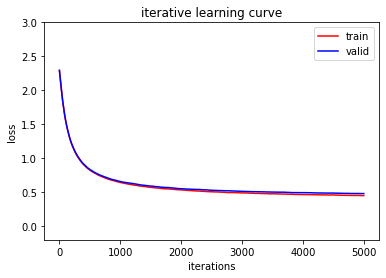

In [51]:
loss_history_valid = compute_loss_history(w_history,valid_X[0:1000,:],valid_y[0:1000],reg)

plt.plot(loss_history, color='r')
plt.plot(loss_history_valid, color='b') 
plt.ylim(0,5)
plt.xlabel('iterations')
plt.ylabel('loss')
plt.title('iterative learning curve')
plt.legend(['train', 'valid'])
plt.ylim(-0.2,3)
plt.show()    

Ê®°ÂûãÂèÇÊï∞Áü©Èòµ ùëä ÊòØ‰∏Ä‰∏™ ùëõ√óùê∂ Áü©ÈòµÔºåÂÖ∂ÊØè‰∏ÄÂàóÂØπÂ∫î‰∏Ä‰∏™Á±ª‰ººÈÄªËæëÂõûÂΩíÁöÑÂàÜÁ±ªÂô®ÔºåËØ•ÂàóÁöÑÊùÉÂÄºÁî®‰∫é‰ªéÊï∞ÊçÆ‰∏≠ÊèêÂèñËÉΩÂà§Êñ≠Êï∞ÊçÆ‰∏≠ÂíåËØ•Á±ªÁõ∏ÂÖ≥ÁöÑÁâπÂæÅ„ÄÇÂØπ‰∫éMNISTÂõæÂÉèÂàÜÁ±ªÁöÑÊ®°ÂûãÂèÇÊï∞ ùëä ÔºåÂèØÂ∞ÜÂÖ∂Êüê‰∏ÄÂàóÔºàÂØπÂ∫îÊüê‰∏™ÂàÜÁ±ªÔºâÁöÑ784Â§ßÂ∞èÁöÑÊùÉÈáçÂèÇÊï∞‰ª•ÂõæÂÉèÂΩ¢ÂºèÊòæÁ§∫Âá∫Êù•„ÄÇÂ¶Ç‰∏ãÈù¢ÁöÑ‰ª£Á†ÅÊòæÁ§∫Á¨¨0ÂàóÔºàÂØπÂ∫îÊï∞Â≠ó0ÁöÑÈÇ£‰∏™Á±ªÔºâÁöÑÊùÉÈáçÂèÇÊï∞ÔºåÂ∞ÜËøôÂàóÂêëÈáèËΩ¨Âåñ‰∏∫ 28√ó28 Â§ßÂ∞èÁöÑÂõæÂÉèÁü©ÈòµÔºö

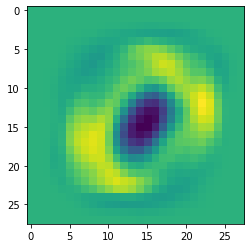

In [52]:
c = 0
plt.imshow(w[1:,c].reshape((28,28)))
plt.show()

Fasion MNISTËÆ≠ÁªÉÈõÜÁöÑsoftmaxÂõûÂΩí

In [55]:
import mnist_reader
X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')
print(X_train.shape,y_train.shape)
print(X_train.dtype,y_train.dtype)

(60000, 784) (60000,)
uint8 uint8


ÊòæÁ§∫ÂÖ∂‰∏≠ÁöÑ‰∏Ä‰∫õÂõæÂÉèÔºö

(60000, 28, 28)


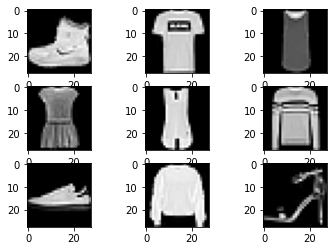

In [56]:
from matplotlib import pyplot
trainX = X_train.reshape(-1,28,28)
print(trainX.shape)
#lot first few images
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # plot raw pixel data
    pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

In [57]:
train_X = X_train.astype('float32')/255.0
test_X = X_test.astype('float32')/255.0
print(train_X.shape,y_train.shape)
print(test_X.shape,y_test.shape)
print(test_X.dtype,y_test.dtype)
print(np.mean(train_X[0:1000,:]))
print(np.mean(test_X[0:1000,:]))
train_y = y_train

(60000, 784) (60000,)
(10000, 784) (10000,)
float32 uint8
0.2829032
0.29028687


In [58]:
len(np.unique(train_y))

10

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline

batchsize = 50
epochs = 5
shuffle = True
alpha = 0.01
reg = 1e-3
gamma = 0.8

w = np.zeros([train_X.shape[1]+1,len(np.unique(train_y))])   
w_history = batch_gradient_descent_softmax(w,train_X,train_y,epochs,batchsize,
                                                shuffle,reg,alpha,gamma)
w = w_history[-1]
print("w: ",w)
X,y = train_X[0:1000,:],train_y[0:1000]
loss_history = compute_loss_history(w_history,X,y,reg)
print(loss_history[:-1:len(loss_history)//10])

w:  [[ 7.13872271e-02 -6.25326773e-02 -7.78654011e-02 ... -6.73204510e-02
  -2.25992186e-01 -3.96112186e-01]
 [-1.39405080e-05 -3.38717194e-06 -1.81418678e-05 ... -1.26165734e-06
  -4.97543204e-06 -1.66549973e-06]
 [ 1.27561238e-04 -2.00792089e-06 -4.44557588e-06 ... -7.95648528e-06
  -5.68093074e-05 -2.09169948e-05]
 ...
 [-1.37307415e-02 -1.60786537e-03  1.83036097e-02 ... -4.47168080e-03
  -1.36509944e-02 -2.70972393e-03]
 [-4.61674182e-03 -3.50748604e-04  3.85299716e-03 ... -1.58283627e-03
  -5.53167732e-03 -1.48483069e-04]
 [-2.10709303e-04 -1.07533380e-04  7.93387181e-04 ... -1.84603646e-04
  -8.60373296e-04  1.02873073e-04]]
[2.2761396889046304, 0.7964752797732344, 0.6907536377516504, 0.6407071871107026, 0.615104492285584, 0.5934714313862737, 0.5762885729260426, 0.5647093666411506, 0.5580982571652005, 0.5463751608858817]


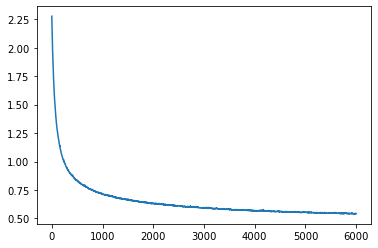

In [60]:
plt.plot(loss_history)

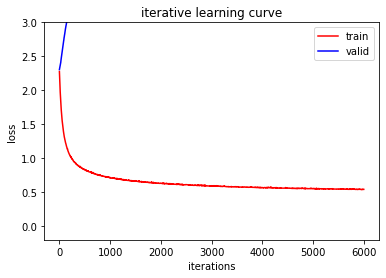

In [61]:
loss_history_valid = compute_loss_history(w_history,test_X[0:1000,:],test_y[0:1000],reg)

plt.plot(loss_history, color='r')
plt.plot(loss_history_valid, color='b') 
plt.ylim(0,5)
plt.xlabel('iterations')
plt.ylabel('loss')
plt.title('iterative learning curve')
plt.legend(['train', 'valid'])
plt.ylim(-0.2,3)
plt.show()  

In [62]:
print("ËÆ≠ÁªÉÈõÜÁöÑÂáÜÁ°ÆÊÄßÔºö",getAccuracy(w,train_X,train_y))
print("ÊµãËØïÈõÜÁöÑÂáÜÁ°ÆÊÄßÔºö",getAccuracy(w,test_X,test_y))

ËÆ≠ÁªÉÈõÜÁöÑÂáÜÁ°ÆÊÄßÔºö 0.82795
ÊµãËØïÈõÜÁöÑÂáÜÁ°ÆÊÄßÔºö 0.0997


### 3.7.4 ÈöèÊú∫Ê¢ØÂ∫¶‰∏ãÈôçÊ≥ï

ÊâπÊ¢ØÂ∫¶‰∏ãÈôçÊ≥ïÊØèÊ¨°Ëø≠‰ª£Âè™Áî®‰∏ÄÂ∞èÊâπÊ†∑Êú¨ÔºåËÄåÈöèÊú∫Ê¢ØÂ∫¶‰∏ãÈôçÊ≥ïÊõ¥Âä†ÊûÅÁ´ØÔºåÊØèÊ¨°Ëø≠‰ª£Âè™Áî®‰∏Ä‰∏™Ê†∑Êú¨„ÄÇÂõ†Ê≠§ÔºåË¶ÅÊâßË°åÈöèÊú∫Ê¢ØÂ∫¶‰∏ãÈôçÔºåÂè™Ë¶ÅÂ∞Ü‰∏äËø∞‰ª£Á†Å‰∏≠Ë∞ÉÁî®ÊâπÊ¢ØÂ∫¶‰∏ãÈôçÊ≥ïÂâçÂ∞ÜÊâπÂ§ßÂ∞èbatchsize‰øÆÊîπ‰∏∫1ÔºåÂç≥ÊØèÊ¨°Âè™Áî®‰∏Ä‰∏™Ê†∑Êú¨Êõ¥Êñ∞Ê®°ÂûãÂèÇÊï∞Ôºå‰∏∫‰∫ÜËäÇÁúÅËÆ≠ÁªÉÊó∂Èó¥ÔºåÂ∞ÜepochsÊîπ‰∏∫2Ê¨°Ôºö

In [63]:
batchsize=1
epochs = 2
w = np.zeros([train_X.shape[1]+1,len(np.unique(train_y))])   
w_history = batch_gradient_descent_softmax(w,train_X,train_y,epochs,batchsize,
                                                shuffle,reg,alpha,gamma)
w = w_history[-1]
print("w: ",w)

w:  [[ 3.43980083e-01 -3.82689114e-01 -7.55376465e-02 ... -4.76886905e-02
  -4.25716194e-01 -1.09449897e+00]
 [-1.86327347e-04 -8.12335257e-06 -1.44934912e-04 ... -1.14782815e-06
  -5.92479477e-05 -5.37628266e-06]
 [ 7.51956062e-04 -7.79895436e-07 -5.96445960e-06 ... -1.39582421e-05
  -6.60711501e-04 -2.38648043e-05]
 ...
 [-4.42026477e-02 -7.47829152e-03  7.41820965e-02 ... -8.84571836e-03
  -7.05771139e-02 -3.17087510e-03]
 [-2.04871398e-02 -9.44509010e-04  2.08531136e-02 ... -2.77501709e-03
  -3.71061063e-02  4.02894187e-03]
 [-8.15255742e-04 -5.30418756e-04  4.76885923e-03 ... -7.14505216e-04
  -4.01528037e-03  1.51593039e-03]]


In [64]:
print("ËÆ≠ÁªÉÈõÜÁöÑÂáÜÁ°ÆÊÄßÔºö",getAccuracy(w,train_X,train_y))
print("ÊµãËØïÈõÜÁöÑÂáÜÁ°ÆÊÄßÔºö",getAccuracy(w,test_X,y_test))

ËÆ≠ÁªÉÈõÜÁöÑÂáÜÁ°ÆÊÄßÔºö 0.8041166666666667
ÊµãËØïÈõÜÁöÑÂáÜÁ°ÆÊÄßÔºö 0.785
